In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulated data: plastic vs paper (2 classes)
# Using random data for demonstration because this is a prototype

X_train = np.random.rand(200, 64, 64, 3)
y_train = np.random.randint(0, 2, 200)

X_val = np.random.rand(40, 64, 64, 3)
y_val = np.random.randint(0, 2, 40)


In [3]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

c:\PLP\week6-AI-Future-Directions\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       200,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,890 (804.26 KB)

 Trainable params: 205,890 (804.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.4850 - loss: 0.8156 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4400 - loss: 0.6963 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5550 - loss: 0.6879 - val_accuracy: 0.5000 - val_loss: 0.6973
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5550 - loss: 0.6838 - val_accuracy: 0.5000 - val_loss: 0.6973
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6450 - loss: 0.6802 - val_accuracy: 0.5000 - val_loss: 0.6931


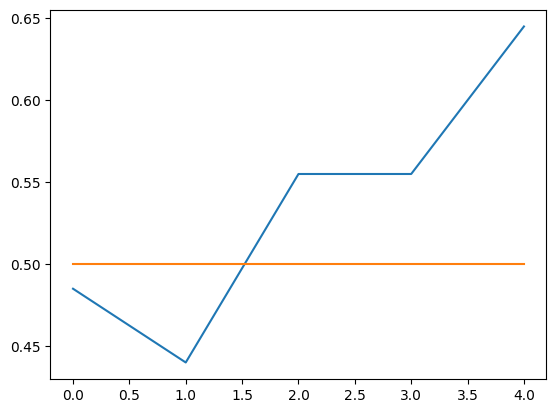

In [4]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

In [5]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save file
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

"Model successfully converted!"

INFO:tensorflow:Assets written to: C:\Users\NJERI\AppData\Local\Temp\tmphze7y6n9\assets


INFO:tensorflow:Assets written to: C:\Users\NJERI\AppData\Local\Temp\tmphze7y6n9\assets


Saved artifact at 'C:\Users\NJERI\AppData\Local\Temp\tmphze7y6n9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2703214345680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703214345872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703214346064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703257011408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703257011216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703257011792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703257011600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703257012176: TensorSpec(shape=(), dtype=tf.resource, name=None)


'Model successfully converted!'

c:\PLP\week6-AI-Future-Directions\venv\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


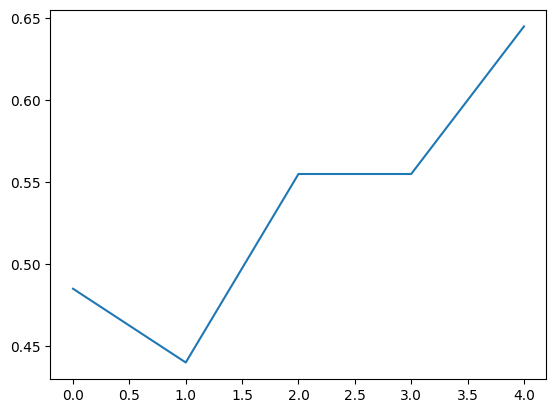

In [6]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

sample = X_val[0:1].astype(np.float32)

interpreter.set_tensor(input_details[0]['index'], sample)
interpreter.invoke()

prediction = interpreter.get_tensor(output_details[0]['index'])
prediction
plt.plot(history.history['accuracy'], label='accuracy')

In [7]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

sample = X_val[0:1].astype(np.float32)

interpreter.set_tensor(input_details[0]['index'], sample)
interpreter.invoke()

prediction = interpreter.get_tensor(output_details[0]['index'])
prediction


array([[0.48842648, 0.51157355]], dtype=float32)

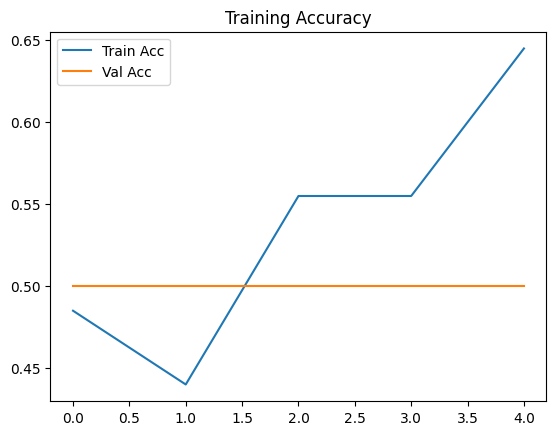

In [8]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training Accuracy")
plt.show()
